<h1>Wine Prediction</h1>

Neste projeto, o objetivo e analisar os dados de um dataset contendo caracteristicas de vinhos e suas classificacoes quanto a vinho vermelho e branco. O dataset contém 6.497 linhas, ou seja amostras de vinho com 13 colunas com características das bebidas 

In [79]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno


#Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [105]:
wine_df = pd.read_csv('wine_dataset.csv')

Visualizando dataset e suas caracteristicas

In [106]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


Dados ausentes

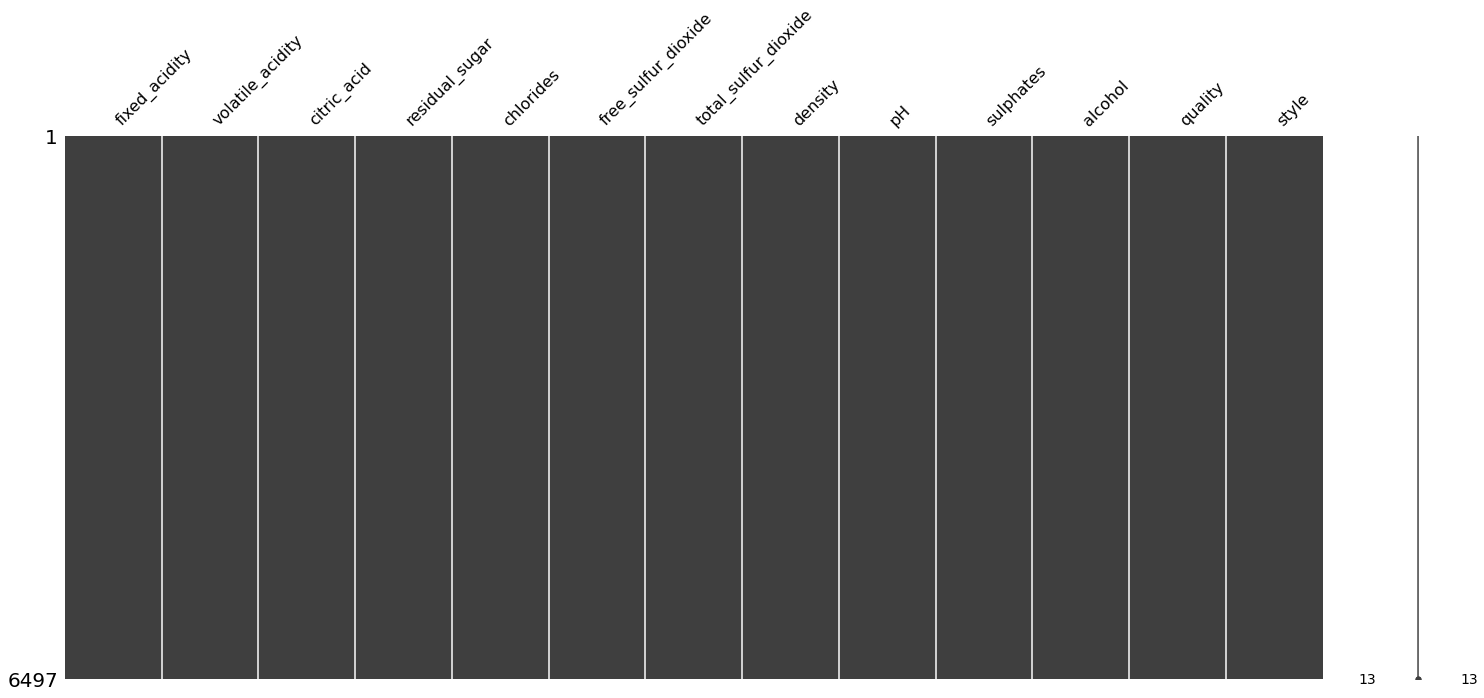

In [12]:
missingno.matrix(wine_df)

O dataset apresenta os vinhos em formato string, portanto é necessário convertê-los para variáveis numéricas para melhorar as análises.

In [107]:
wine_df['style'] = wine_df['style'].map({'red': 0, 'white': 1})

In [108]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


Correlação e visualização de dados

In [30]:
corr = wine_df.corr()
corr.T

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


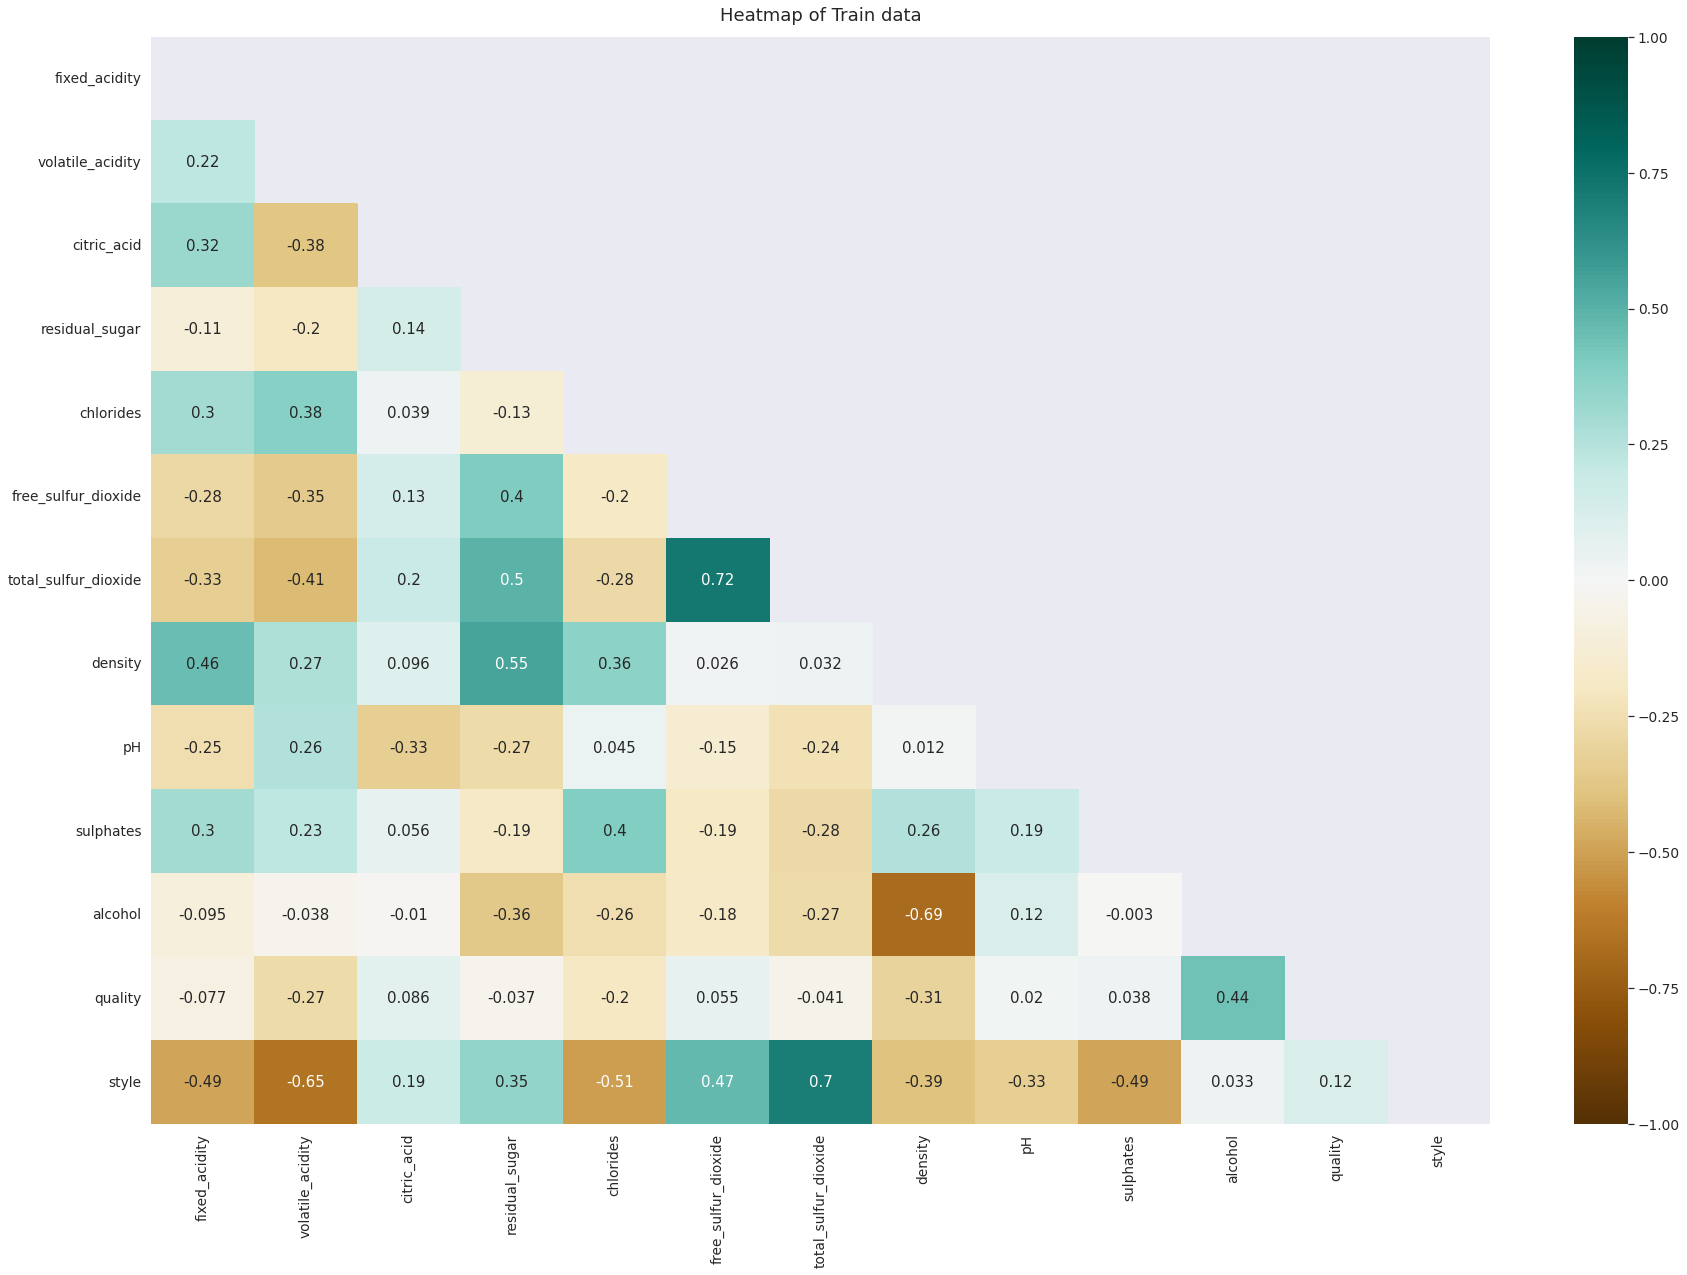

In [42]:
plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(wine_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(wine_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Train data', fontdict={'fontsize':18}, pad=16);

Correlação usando como parâmetro de separação das amostras os valores de vinho vermelho em azul e vinho branco em laranja.

In [49]:
sns.pairplot(wine_df, size = 2.5, hue='style')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Nota-se que a maior correlacao, com valor de 0,72 em free_sulfur_dioxide e free_sulfur_dioxide

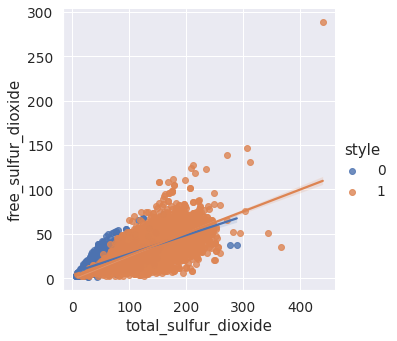

In [48]:
sns.lmplot(x='total_sulfur_dioxide',y='free_sulfur_dioxide', hue='style',data=wine_df)

Machine Learning pre processamento

In [109]:
x = wine_df.drop('style', axis=1)
y = wine_df['style']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Machine Learning

LogisticRegression

In [113]:
model = LogisticRegression() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9769230769230769


Verificando com dados com que o modelo nao teve contato para determinar a acuracia.

In [128]:
x_test[205:225]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4050,6.60,0.56,0.15,10.0,0.037,38.0,157.0,0.99642,3.28,0.52,9.4,5
3068,7.20,0.40,0.49,1.1,0.048,11.0,138.0,0.99290,3.01,0.42,9.3,5
342,10.90,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
4213,6.15,0.21,0.37,3.2,0.021,20.0,80.0,0.99076,3.39,0.47,12.0,5
1325,6.70,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
1662,6.60,0.38,0.15,4.6,0.044,25.0,78.0,0.99310,3.11,0.38,10.2,6
3828,6.90,0.25,0.35,9.2,0.034,42.0,150.0,0.99470,3.21,0.36,11.5,6
5544,6.20,0.27,0.32,6.3,0.048,47.0,159.0,0.99282,3.21,0.60,11.0,6
2977,6.90,0.28,0.30,1.6,0.047,46.0,132.0,0.99180,3.35,0.38,11.1,7
1934,6.30,0.23,0.30,1.8,0.033,16.0,91.0,0.99060,3.28,0.40,11.8,6


In [136]:
t1 = np.array(y_test[205:225])
t1

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [134]:
t2 = model.predict(x_test[205:225])
t2

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [144]:
print(f'Resultado {(t2.sum())/(t1.sum())*100}%')

Resultado 100.0%


LinearSVC

In [115]:
model = RandomForestClassifier() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9994871794871795


RandomForestClassifier

In [116]:
model = LinearSVC() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9774358974358974


ExtraTreesClassifier

In [117]:
model = ExtraTreesClassifier() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9994871794871795


KNeighborsClassifier

In [118]:
model = KNeighborsClassifier() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9482051282051283


GaussianNB

In [119]:
model = GaussianNB() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9702564102564103


Perceptron

In [120]:
model = Perceptron() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.8861538461538462


SGDClassifier

In [121]:
model = SGDClassifier() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.5348717948717949


DecisionTreeClassifier

In [122]:
model = DecisionTreeClassifier() 
model.fit(x_test, y_test)
result = model.score(x_test, y_test)
print(f"Acurácia: {result}")

Acurácia: 0.9994871794871795
